# Solar Flares Data Analysis

In this project, I will webscrape solar flare data from spaceweatherlive.com and NASA in order to compare the information between these two sources.

## Part 1: Data Scraping and Preparation

### Step 1: Scrape Space Weather Live Data

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests as req
from datetime import datetime

Extract html from URL, parse with BeautifulSoup, find the table, and rename columns

In [2]:
x = req.get('https://cmsc320.github.io/files/top-50-solar-flares.html')
html = x.text
soup = BeautifulSoup(html, features="html.parser")
table = soup.find('table')
df = pd.read_html(str(table))
df = df[0]
df.columns = ['rank', 'x_classification', 'date', 'region', 'start_time', 'max_time', 'end_time', 'movie']
df.head()

,rank,x_classification,date,region,start_time,max_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive


### Step 2: Tidy the Data

Combine date and time columns, and convert strings to datetime objects

In [3]:
df = df.iloc[:, 0:7]

df['start_time'] = df['date'] + ' ' + df['start_time'] + ':00'
df['max_time'] = df['date'] + ' ' + df['max_time'] + ':00'
df['end_time'] = df['date'] + ' ' + df['end_time'] + ':00'

df = df[['rank', 'x_classification', 'start_time', 'max_time', 'end_time', 'region']]

for index in range(0,len(df)):
    df.at[index, 'start_time'] = datetime.strptime(df.at[index, 'start_time'], '%Y/%m/%d %H:%M:%S')
    df.at[index, 'end_time'] = datetime.strptime(df.at[index, 'end_time'], '%Y/%m/%d %H:%M:%S')
    df.at[index, 'max_time'] = datetime.strptime(df.at[index, 'max_time'], '%Y/%m/%d %H:%M:%S')

df.head()

,rank,x_classification,start_time,max_time,end_time,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415


### Step 3: Scrape NASA Data

Similar to Step 1, extract html text from URL, parse with BeautifulSoup, find the table, remove unnecessary columns, and rename columns

In [4]:
x2 = req.get('https://cmsc320.github.io/files/waves_type2.html')
html2 = x2.text
soup2 = BeautifulSoup(html2, features="html.parser")
table2 = soup2.find('pre')
data = str(table2).split('\n')
data = data[12:len(data)-2]

In [5]:
df2 = []

for row in data:
    items = row.split()
    df2.append(items)

df2 = pd.DataFrame(df2)
df2 = df2[[0,1,2,3,5,7,8,9,10,12,13,14,15,17]]
df2.columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 'flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed']
df2.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,"href=""https://cdaw.gsfc.nasa.gov/CME_list/dail...","href=""https://cdaw.gsfc.nasa.gov/CME_list/dail...",S25E16,8026,M1.3,"href=""https://cdaw.gsfc.nasa.gov/CME_list/UNIV...",15:18,74,79,"href=""https://cdaw.gsfc.nasa.gov/CME_list/UNIV..."
1,1997/04/07,14:30,04/07,17:30,"href=""https://cdaw.gsfc.nasa.gov/CME_list/dail...","href=""https://cdaw.gsfc.nasa.gov/CME_list/dail...",S28E19,8027,C6.8,"href=""https://cdaw.gsfc.nasa.gov/CME_list/UNIV...",14:27,Halo,360,"href=""https://cdaw.gsfc.nasa.gov/CME_list/UNIV..."
2,1997/05/12,05:15,05/14,16:00,"href=""https://cdaw.gsfc.nasa.gov/CME_list/dail...","href=""https://cdaw.gsfc.nasa.gov/CME_list/dail...",N21W08,8038,C1.3,"href=""https://cdaw.gsfc.nasa.gov/CME_list/UNIV...",05:30,Halo,360,"href=""https://cdaw.gsfc.nasa.gov/CME_list/UNIV..."
3,1997/05/21,20:20,05/21,22:00,"href=""https://cdaw.gsfc.nasa.gov/CME_list/dail...","href=""https://cdaw.gsfc.nasa.gov/CME_list/dail...",N05W12,8040,M1.3,"href=""https://cdaw.gsfc.nasa.gov/CME_list/UNIV...",21:00,263,165,"href=""https://cdaw.gsfc.nasa.gov/CME_list/UNIV..."
4,1997/09/23,21:53,09/23,22:16,"href=""https://cdaw.gsfc.nasa.gov/CME_list/dail...","href=""https://cdaw.gsfc.nasa.gov/CME_list/dail...",S29E25,8088,C1.4,"href=""https://cdaw.gsfc.nasa.gov/CME_list/UNIV...",22:02,133,155,"href=""https://cdaw.gsfc.nasa.gov/CME_list/UNIV..."


Extract data from hyperlinks

In [6]:
import re

for index in range(0,len(data)):
    df2['start_frequency'][index] = str(re.findall('[0-9]+</a>', df2['start_frequency'][index]))
    df2['start_frequency'][index] = df2['start_frequency'][index][2:-6]
    df2['end_frequency'][index] = str(re.findall('[0-9]+</a>', df2['end_frequency'][index]))
    df2['end_frequency'][index] = df2['end_frequency'][index][2:-6]
    df2['cme_date'][index] = str(re.findall('[0-9]{2}/[0-9]{2}</a>', df2['cme_date'][index]))
    df2['cme_date'][index] = df2['cme_date'][index][2:-6]
    df2['cme_speed'][index] = str(re.findall('[0-9]+</a>', str(df2['cme_speed'][index])))
    df2['cme_speed'][index] = df2['cme_speed'][index][2:-6]

df2.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712


### Step 4: Tidy NASA Dataset

Recode missing entries

In [7]:
df2 = df2.replace(to_replace ='-+', value = np.NaN, regex = True)

Create is_halo column, replace Halos with NA.

Create width_lower_bound column, remove non-numeric part.

In [8]:
df2['is_halo'] = (df2['cme_angle'] == 'Halo')
df2 = df2.replace(to_replace ='Halo', value = 'NA')

lower_bounds = []
for index in range(0,len(data)):
    if '&gt;' in str(df2.at[index, 'cme_width']):
        lower_bounds.append(True)
        df2.at[index, 'cme_width'] = df2.at[index, 'cme_width'][4:]
    else:
        lower_bounds.append(False)
df2['width_lower_bound'] = lower_bounds

df2.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,False,False
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NA,360,878,True,False
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NA,360,464,True,False
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,False,False
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,False,False


Combine date and time columns

In [9]:
df2['start_time'] = df2['start_date'] + ' ' + df2['start_time'] + ':00'
for index in range(0,len(data)):
    year = df2.at[index, 'start_date'][0:4] + '/'
    if df2.at[index, 'end_time'] != np.NaN:
        df2.at[index, 'end_time'] = year + df2.at[index, 'end_date'] + ' ' + df2.at[index, 'end_time'] + ':00'
    if df2.at[index, 'cme_time'] != np.NaN:
        df2.at[index, 'cme_time'] = year + str(df2.at[index, 'cme_date']) + ' ' + str(df2.at[index, 'cme_time']) + ':00'

df2 = df2.drop(['start_date', 'end_date', 'cme_date'], axis=1)
df2.head()

,start_time,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
0,1997/04/01 14:00:00,1997/04/01 14:15:00,8000,4000,S25E16,8026,M1.3,1997/04/01 15:18:00,74,79,312,False,False
1,1997/04/07 14:30:00,1997/04/07 17:30:00,11000,1000,S28E19,8027,C6.8,1997/04/07 14:27:00,NA,360,878,True,False
2,1997/05/12 05:15:00,1997/05/14 16:00:00,12000,80,N21W08,8038,C1.3,1997/05/12 05:30:00,NA,360,464,True,False
3,1997/05/21 20:20:00,1997/05/21 22:00:00,5000,500,N05W12,8040,M1.3,1997/05/21 21:00:00,263,165,296,False,False
4,1997/09/23 21:53:00,1997/09/23 22:16:00,6000,2000,S29E25,8088,C1.4,1997/09/23 22:02:00,133,155,712,False,False


Tidy missing values in cme_time

In [10]:
for index in range(0,len(df2)):
    if df2.at[index, 'cme_time'][-4] == 'n':
        df2.at[index, 'cme_time'] = np.NaN

Fix 24:00:00 times

In [11]:
for index in range(0,len(df2)):
    if df2.at[index, 'end_time'][11:] == '24:00:00':
        day = df2.at[index, 'end_time'][8:10]
        df2.at[index, 'end_time'] = df2.at[index, 'end_time'][0:8] + str(int(day) + 1).zfill(2) + ' 00:00:00'

Convert strings to datetime objects

In [12]:
for index in range(0,len(data)):
    df2.at[index, 'start_time'] = datetime.strptime(df2.at[index, 'start_time'], '%Y/%m/%d %H:%M:%S')
    df2.at[index, 'end_time'] = datetime.strptime(df2.at[index, 'end_time'], '%Y/%m/%d %H:%M:%S')
    if not pd.isnull(df2.at[index, 'cme_time']):
        df2.at[index, 'cme_time'] = datetime.strptime(df2.at[index, 'cme_time'], '%Y/%m/%d %H:%M:%S')

df2.head()

,start_time,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False


## Part 2: Analysis

### Question 1: Replication

Sort rows by classification by converting strings to floats

In [13]:
df2_sorted = df2.sort_values('flare_classification', ascending=False)[0:50]
df2_sorted['flare_classification'] = df2_sorted['flare_classification'].str[1:]
df2_sorted = df2_sorted.astype({'flare_classification':'float'})
df2_sorted = df2_sorted.sort_values('flare_classification', ascending=False)
df2_sorted = df2_sorted.reset_index(drop=True)
df2_sorted.head()

,start_time,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
0,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,28.0,2003-11-04 19:54:00,NA,360,2657,True,False
1,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,20.0,2001-04-02 22:06:00,261,244,2505,False,False
2,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,17.0,2003-10-28 11:30:00,NA,360,2459,True,False
3,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,14.0,2001-04-15 14:06:00,245,167,1199,False,False
4,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,10.0,2003-10-29 20:54:00,NA,360,2029,True,False


Compare to Space Weather Live data

In [14]:
df.head()

,rank,x_classification,start_time,max_time,end_time,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415


Compare start dates of top 50 from NASA to top 50 from Space Weather Live

In [15]:
dates = []
for index in range(0,50):
    dates.append(df.at[index, 'start_time'].date())
count = 0
for index in range(0,50):
    if df2_sorted.at[index, 'start_time'].date() not in dates:
        count += 1
print(str(count) + " flares in the NASA table were not in SWL table.")

16 flares in the NASA table were not in SWL table.


The top 50 solar flares from the NASA table does appear to mostly match the top 50 flares from spaceweatherlive.com. However, some of the flares are not found in both tables.

### Question 2: Integration

"Best matching" criterion:
Check if any of these match (in order of precedence):
-be on the same day
-should be from the same region
-have the same classification

Create column indicating best matching row from NASA data

In [16]:
best_match = []

for i in range(0,len(df)):
    old_length = len(best_match)
    for j in range(0,len(df2)):
        if df.at[i, 'start_time'].date() == df2.at[j, 'start_time'].date():
            best_match.append(j)
            break
        elif df2.at[j, 'flare_region'] != np.NaN and df.at[i, 'region'] == str(df2.at[j, 'flare_region'])[-len(str(df.at[i, 'region'])):]:
            best_match.append(j)
            break
        elif df.at[i, 'x_classification'] == df2.at[i, 'flare_classification']:
            best_match.append(j)
            break
    if old_length == len(best_match):
        best_match.append(np.NaN)

df['best_match'] = best_match
df.head()

,rank,x_classification,start_time,max_time,end_time,region,best_match
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486,240.0
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393,116.0
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486,233.0
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808,316.0
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415,126.0


Add ranking column to NASA table

In [17]:
rankings = []
for row in range(0,len(df2)):
    if row in best_match:
        rankings.append(best_match.index(row) + 1)
    else:
        rankings.append(np.NaN)

df2['rankings'] = rankings
df2.head()

,start_time,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,rankings
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False,NaN
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,True,False,NaN
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,True,False,NaN
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False,NaN
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False,NaN


I matched rows based on the same day, then the same region, and finally the same flare classification. If multiple rows from the NASA table matched one of the top 50 flares, then I would choose based on which matched criterion had the higher priority. For example, if one row matched a top 50 flare in the day and another matched the same flare in the region, I would choose the first one because matching on the same day has a higher priority.

### Question 3: Analysis

Do flares in the top 50 tend to have more Halo CMEs than non-top 50 flares?

Create True/False column for top 50 flares

In [18]:
in_top50 = []
for time in df2['start_time']:
    in_top50.append(str(time) in str(df2_sorted['start_time']))

df2['in_top50'] = in_top50
df2[['in_top50', 'is_halo', 'flare_classification', 'start_time', 'end_time']].head()

,in_top50,is_halo,flare_classification,start_time,end_time
0,False,False,M1.3,1997-04-01 14:00:00,1997-04-01 14:15:00
1,False,True,C6.8,1997-04-07 14:30:00,1997-04-07 17:30:00
2,False,True,C1.3,1997-05-12 05:15:00,1997-05-14 16:00:00
3,False,False,M1.3,1997-05-21 20:20:00,1997-05-21 22:00:00
4,False,False,C1.4,1997-09-23 21:53:00,1997-09-23 22:16:00


In [19]:
df2.groupby(['in_top50']).sum(['is_halo'])

,is_halo,width_lower_bound,rankings
in_top50,,,
False,242,31,217.0
True,44,0,650.0


44 of the top 50 solar flares (88%) have halos, while 242 of the 468 remaining ones (51.7%) have halos

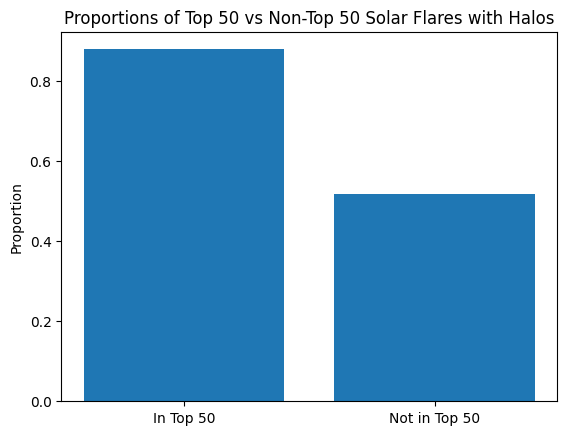

In [20]:
import matplotlib.pyplot as plt

info = [[44/50, 242/468]]
columns = ['In Top 50', 'Not in Top 50']
values = np.arange(0,1,0.2)

plt.bar(columns, info[0])
plt.ylabel("Proportion")
plt.yticks(values)
plt.title('Proportions of Top 50 vs Non-Top 50 Solar Flares with Halos')

plt.show()

The plot shows that the proportion of Top 50 Solar Flares that have halos (88%) does appear to be significantly greater than that of the Non-Top 50 (51.7%). Perhaps a t-test of proportions could be applied.